# 5 Plotting, Data Visualization and Exploration

*Disclaimer: The "Plotting" section of this session was based in a nice tutorial by Peter Wittek. Unfortunatelly, this tutorial is no longer available in Peter's [qml-rg](https://github.com/peterwittek/qml-rg) GitHub repository.*

## Introduction

Making nice plots is an involved and painful task. A few paradigms emerged over the decades, each with its own advantages and disadvantages. Restricting to plotting functions and statistical data, R as a language for statistical processing is popular in no small part due to its plotting module, [ggplot2](http://ggplot2.tidyverse.org/), which implements a school of plotting called *grammar of graphics*. This is a *declarative* approach, subsequent statements added to the plot define the final looks. On the other hand, Python's main plotting module, a behemoth called [Matplotlib](http://matplotlib.org/), is *object-oriented*: the figure is made up of a hierarchy of classes, and the properties of these will decide the look of the final image. Matplotlib is complex and you will often get the impression that it was designed to make plotting simple things difficult, and its default settings do not produce the most beautiful plots on the planet. The module [Seaborn](http://seaborn.pydata.org/) wraps around Matplotlib, and for a restricted set of plot types, it makes your task very easy. It also changes the horrific defaults of Matplotlib, so importing will change the look of all of your plots, whether they were done with Matplotlib calls or with Seaborn. This is why we do not import it in the first cell of this notebook. Seaborn also makes plotting statistical data easy and it interoperates marvellously with the statistical package [Pandas](http://pandas.pydata.org/). Python also has modules for *declarative plotting*; try [Altair](https://altair-viz.github.io/), and see [this write-up](https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/) why it is interesting in the first place. Here we will discuss only the object-oriented approach of Matplotlib and Seaborn. Finally, we will discuss [Bokeh](http://bokeh.pydata.org/en/latest/), a tool for making interactive plots.

First, as usual, we load the corresponding libraries. For this part we will use, apart from Matplotlib and Seaborn, Numpy for handling arrays and operations, and Pandas for dataset manipulations.

In [1]:
import bokeh
import bokeh.plotting as bkh
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import urllib

%matplotlib inline
print('Matplotlib:', matplotlib.__version__)
print('Numpy:', np.__version__)
print('Pandas:', pd.__version__)

Matplotlib: 3.4.3
Numpy: 1.21.0
Pandas: 1.3.1


Notice the line that starts with %. This is a 'magic command' specific to Jupyter. It ensures that images will be plotted inline, instead of popping up in a window. You can look at all magic commands by entering `%quickref`. Some are useful, although most of them are not. The magic commands are not part of Python, so calling them in a script will throw an error. Keep this in mind when you copy code from a notebook.

Also, note that we have not imported Seaborn yet, for the reasons mentioned above.

## Plotting

Now we can get to business. We begin with Matplotlib to show the basic features of plotting, and then we focus on Seaborn and its data analysis tools.

### Matplotlib
#### The Basics

This is the bare minimum you need to plot a function:

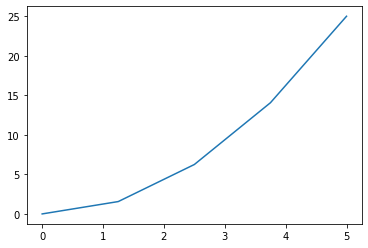

In [2]:
# Create a line from 0 to 5 (5 included) with 5 points
x = np.linspace(0, 5, 5)

# Plot y(x) = x**2
plt.plot(x, x**2);

We imported the module `matplotlib.plot` as `plt`, and we call a function of it called `plot` to plot the square function. You always plot discrete points: `x` is a numpy array containing five points as a linear approximation between zero and five. On closer inspection, the curve is not smooth: this is because five points are not enough for the illusion of smoothness. Let us add some more points, labels for the axes, and a title for the figure:

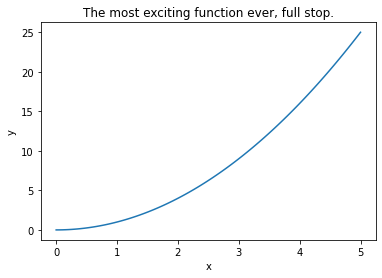

In [3]:
# Create a line from 0 to 5 (5 included) with 100 points
x = np.linspace(0, 5, 100)

# Compute x**2
y2 = x**2

# Plot y2(x) = x**2
plt.plot(x, y2)

# Add x and y labels
plt.xlabel('x')
plt.ylabel('y')

# Add title
plt.title('The most exciting function ever, full stop.');

The order in which you add the decorations to your figure does not matter. Everything that you write to appear in the cell will appear. This is because the execution of the cell triggers the call of the function `plt.show()`, which instructs Matplotlib to draw the figure *and* display it. In a Python script, you would always call `plt.show()` manually. Let us plot the cube function too, and call `plt.show()` manually:

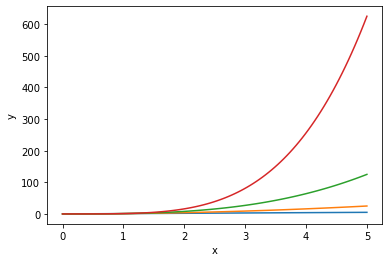

In [4]:
# Create a line from 0 to 5 (included) with 100 points
x = np.linspace(0, 5, 100)

# Compute x**3 and x**4
y3 = x**3
y4 = x**4

# Plot y1(x) = x, y2(x) = x**2, y3(x) = x**3, y4(x) = x**4
plt.plot(x, x)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)

# Add x and y labels
plt.xlabel('x')
plt.ylabel('y')

# Showing the plot
plt.show()

Notice the difference with this case:

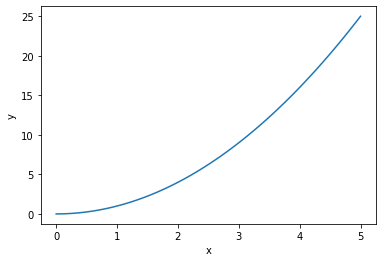

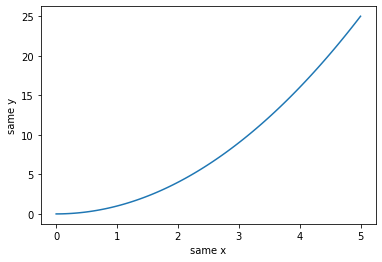

In [5]:
# Plot y2(x) = x**2; add x and y labels; show the figure
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Add x and y labels for incomming (not for the previous one) figure
plt.xlabel('same x')
plt.ylabel('same y')

# Plot y2(x) = x**3
plt.plot(x, y2)

# Show figure
plt.show()

The `plt.show()` resets all settings after displaying, so for the second figure, you must set the axes again (note the difference in axes labels)

Instead of showing the plot on the screen, you can write them to a file, which will also trigger Matplotlib to draw the figure. If you export it to PDF, it will be as scale-invariant as it can possibly be.

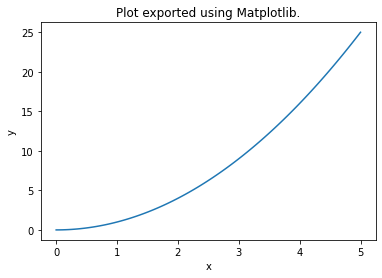

In [6]:
# Plot y1(x) = x**2; add x and y labels
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('y')

# Exporting the figure
plt.savefig('whatever.pdf')

# Add title
plt.title('Plot exported using Matplotlib.')

# Show figure
plt.show()

You should find the plot right in the directory of the notebook.

#### Object-oriented Paradigm

The image that you see displayed is composed of a hierarchical structure of components. On the top level, it is an instance of the `Figure` class. This is what `plt.plot()` creates for you, with all the other underlying structures within; this function is for your convenience to avoid dealing with classes if you want a simple plot. The structures in the hierarchy include the area where you draw, which is technically called the `Axes` class. You may have more than one `Axes` if you have subplots or embedded plots. `Axes` than have x and y axes, which in turn have a scale, ticks, labels, and so on. If you have a single `Axes` class instantiated, like in the examples below, you can access and change most parts of the hierarchy like you did above with the x and y labels and the figure title. If you want to do anything non-trivial, you have to compose the figure and its components yourself. The examples in this section are mainly from [this tutorial](https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb). A more detailed version of the plot of the square function is:

Armed with this knowledge, we can do inserts:

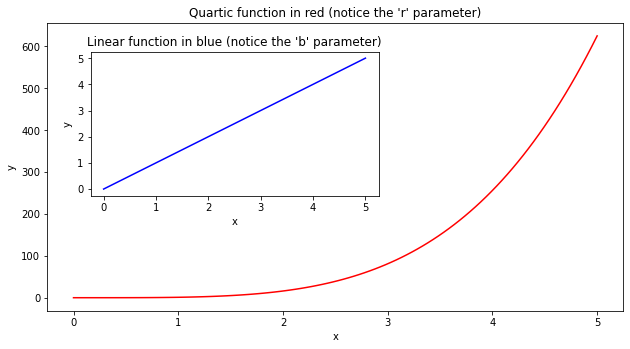

In [7]:
fig = plt.figure()

# Add main axes (big 4/3 x 3/3) at position 0, 0 [left, bottom, width, height]
ax1 = fig.add_axes([0, 0, 4/3, 3/3])

# Add insert axes (small 4/6 x 3/6) at position 0.1, 0.1 [left, bottom, width, height]
ax2 = fig.add_axes([0.1, 0.4, 4/6, 3/6]) # insert axes

# main
ax1.plot(x, y4, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title("Quartic function in red (notice the 'r' parameter)")

# insert
ax2.plot(x, x, 'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title("Linear function in blue (notice the 'b' parameter)")

plt.show()

To avoid specifying each axes size and position by hand, we have `fig.add_subplot()`.

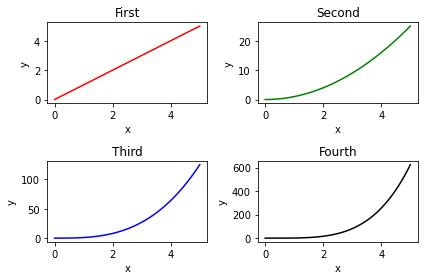

In [8]:
fig = plt.figure()
# In a 2 row x 2 cols subplot grid, add the first subplot
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(x, x, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.title.set_text('First')

# In a 2 row x 2 cols subplot grid, add the second subplot
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(x, y2, 'g')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.title.set_text('Second')

# In a 2 row x 2 cols subplot grid, add the third subplot
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(x, y3, 'b')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.title.set_text('Third')

# In a 2 row x 2 cols subplot grid, add the third subplot
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(x, y4, 'k')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.title.set_text('Fourth')

# Prevent overlapping of the plots
fig.tight_layout()

plt.show()

You can also do aribtrary grids of subplots. The function `plt.subplots` conveniently creates you the figure object and returns it to you along with the axes:

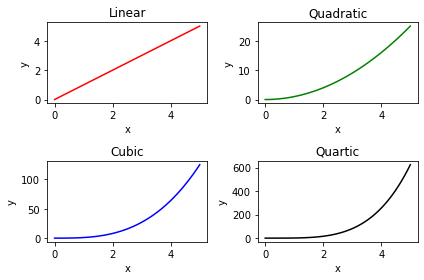

In [9]:
# Initiate a 2 rows 2 x cols subplot fig
fig, axes = plt.subplots(nrows=2, ncols=2)

# Define the powers, the labels, and the colors
power = np.arange(1, 5, 1)
labels = ['Linear', 'Quadratic', 'Cubic', 'Quartic']
colors = ['r', 'g', 'b', 'k']

# For each index and ax in the enumeration of the figure axes...
for i, ax in enumerate(fig.axes):
    ax.plot(x, x**power[i], colors[i])
    ax.set_title(labels[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
# Prevent overlapping of the plots
fig.tight_layout()
plt.show()

An always useful thing is to label different plots on the same figure and display the legend with the corresponding labels. The easiest way to do this is assigning a label to each of the plots when calling the `plot()` function, and at the end of the image calling the function `legend()`:

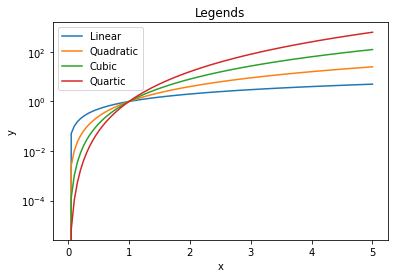

In [10]:
# Equivalent to fig = plt.figure() and ax = fig.add_subplot(1, 1, 1)
fig, ax = plt.subplots()
ax.plot(x, x, label='Linear')
ax.plot(x, y2, label='Quadratic')
ax.plot(x, y3, label='Cubic')
ax.plot(x, y4, label='Quartic')

# Location of the legend can be modified with this parameter
ax.legend(loc=0)
# 'best':          0
# 'upper right':   1
# 'upper left':    2
# 'lower left':    3
# 'lower right':   4
# 'right':         5
# 'center left':   6
# 'center right':  7
# 'lower center':  8
# 'upper center':  9
# 'center':       10

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Legends')

ax.set_yscale('log')

plt.show()

Error bars can be added in both the $x$ and $y$ axes. This is achieved using the `errorbar` function

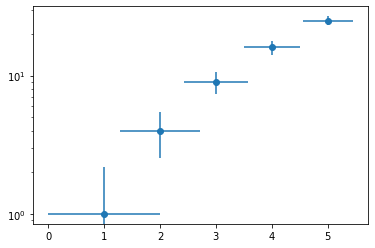

In [11]:
xs = np.linspace(1, 5, 5)
ys = xs ** 2
xerr = 1 / np.sqrt(xs)
yerr = xs ** (1 / 3) + [0.2 for _ in xs]

fig, ax = plt.subplots()
ax.errorbar(xs, ys, xerr=xerr, yerr=yerr, ls='none', fmt='o')    # ls is for line style, fmt for format
ax.set_yscale('log')
plt.show()

Matplotlib can also handle LaTeX formulas and font changes. LaTeX formulas need to be enclosed in $$, preceded by an `r` to avoid problems with backslashes. For global font changes, one has to update the Matplotlib configuration parameters. TeX can be used to process all the text in the figure as well with `'text.usetex': True`, although a TeX compiler is needed in this case.

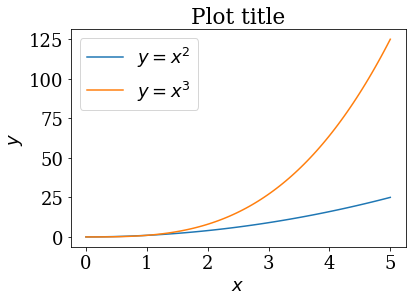

In [12]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

fig, ax = plt.subplots()
ax.plot(x, y2, label=r'$y = x^2$')
ax.plot(x, y3, label=r'$y = x^3$')
ax.legend(loc=2)  # upper left corner
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Plot title')
plt.show()

Matplotlib can also handle 3-dimensional plots. For that we need to import the 3-dimensional axes submodule

In [13]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

And now we can, for instance, plot surfaces

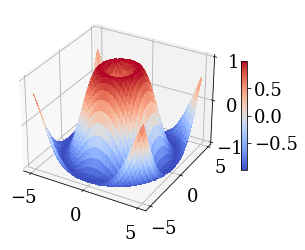

In [14]:
X = np.linspace(-5, 5, 40)
Y = np.arange(-5, 5, 0.25)  # Defining an array of equi-spaced numbers
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=matplotlib.cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5)

plt.show()

The rest is all about exploring the parameter space. Here we manually create a grid (this is necessary if we mix 2D, 3D or polar coordinates), and plot a bunch of things that Matplotlib can do. For more examples, refer to the [gallery](http://matplotlib.org/gallery.html).

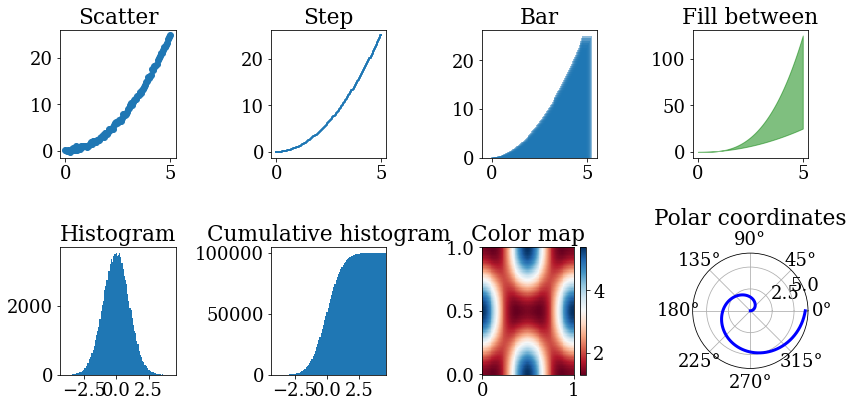

In [15]:
# Some new data will be necessary
n = np.random.randn(100000)
t = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(t, t)
Z = (2.7 - 2 * np.cos(Y) * np.cos(X) - 0.7 * np.cos(np.pi - 2*Y)).T

# The actual plot
fig = plt.figure(figsize=(12, 6))
axes = [[],[]]

axes[0].append(fig.add_subplot(2, 4, 1))
axes[0][0].scatter(x, x ** 2 + 0.25 * np.random.randn(len(x)))
axes[0][0].set_title('Scatter')

axes[0].append(fig.add_subplot(2, 4, 2))
axes[0][1].step(x, y2, lw=2)
axes[0][1].set_title('Step')

axes[0].append(fig.add_subplot(2, 4, 3))
axes[0][2].bar(x, y2, align='center', width=0.5, alpha=0.5)
axes[0][2].set_title('Bar')

axes[0].append(fig.add_subplot(2, 4, 4))
axes[0][3].fill_between(x, y2, y3, color='green', alpha=0.5);
axes[0][3].set_title('Fill between');

axes[1].append(fig.add_subplot(2, 4, 5))
axes[1][0].hist(n, bins=100)
axes[1][0].set_title('Histogram')
axes[1][0].set_xlim((min(n), max(n)))

axes[1].append(fig.add_subplot(2, 4, 6))
axes[1][1].hist(n, bins=100, cumulative=True)
axes[1][1].set_title('Cumulative histogram')
axes[1][1].set_xlim((min(n), max(n)))

axes[1].append(fig.add_subplot(2, 4, 7))
p = axes[1][2].pcolor(
    X / (2 * np.pi),
    Y / (2 * np.pi),
    Z,
    cmap=matplotlib.cm.RdBu,
    vmin=abs(Z).min(),
    vmax=abs(Z).max(),
    shading='auto',
)
axes[1][2].set_title('Color map')
fig.colorbar(p, ax=axes[1][2])

axes[1].append(fig.add_subplot(2, 4, 8, polar=True))
axes[1][3].plot(t, t, color='blue', lw=3);
axes[1][3].set_title('Polar coordinates')

fig.tight_layout()
plt.show()

**Exercise 1**. Create a three by three grid. Put the BIST logo in the center. Surround him with aesthetically pleasing functions in the remaining subplots. Hint: `PIL.Image.open(urllib.request.urlopen(url))` will get you the BIST logo, and the function `imshow` will plot it.

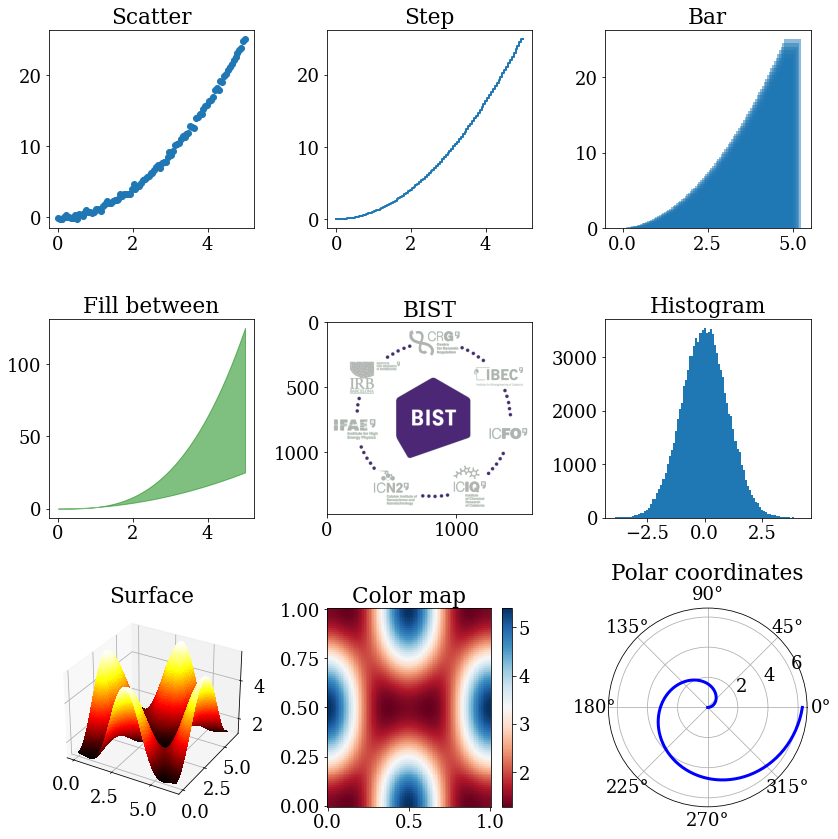

In [16]:
# All the data has been loaded already, except for the image
url = 'http://bist.eu/wp-content/uploads/2016/05/BIST-7-centres-GRISOS.png'
bist = PIL.Image.open(urllib.request.urlopen(url))

# The actual plot
fig = plt.figure(figsize=(12, 12))
axes = [[],[],[]]

axes[0].append(fig.add_subplot(3, 3, 1))
axes[0][0].scatter(x, x ** 2 + 0.25 * np.random.randn(len(x)))
axes[0][0].set_title('Scatter')

axes[0].append(fig.add_subplot(3, 3, 2))
axes[0][1].step(x, y2, lw=2)
axes[0][1].set_title('Step')

axes[0].append(fig.add_subplot(3, 3, 3))
axes[0][2].bar(x, y2, align='center', width=0.5, alpha=0.5)
axes[0][2].set_title('Bar')

axes[1].append(fig.add_subplot(3, 3, 4))
axes[1][0].fill_between(x, y2, y3, color='green', alpha=0.5);
axes[1][0].set_title('Fill between');

axes[1].append(fig.add_subplot(3, 3, 5))
axes[1][1].imshow(bist)
axes[1][1].set_title('BIST')

axes[1].append(fig.add_subplot(3, 3, 6))
axes[1][2].hist(n, bins=100)
axes[1][2].set_title('Histogram')
axes[1][2].set_xlim((min(n), max(n)))

axes[2].append(fig.add_subplot(3, 3, 7, projection='3d'))
axes[2][0].plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.hot, linewidth=0, antialiased=False)
axes[2][0].set_title('Surface')

axes[2].append(fig.add_subplot(3, 3, 8))
p = axes[2][1].pcolor(
    X / (2 * np.pi), 
    Y / (2 * np.pi), 
    Z, 
    cmap=matplotlib.cm.RdBu, 
    vmin=abs(Z).min(), 
    vmax=abs(Z).max(),
    shading='auto',
)
axes[2][1].set_title('Color map')
fig.colorbar(p, ax=axes[2][1])

axes[2].append(fig.add_subplot(3, 3, 9, polar=True))
axes[2][2].plot(t, t, color='blue', lw=3);
axes[2][2].set_title('Polar coordinates')

fig.tight_layout()
plt.show()

### Seaborn and Pandas

Seaborn is primarily meant for statistical plotting, but it also improves the defaults of all Matplotlib figures.

#### Side Effect of Importing Seaborn
 
Witness the magic:

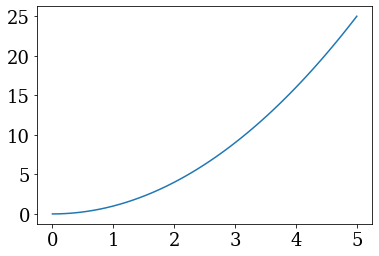

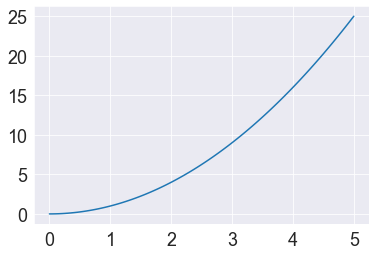

In [17]:
plt.plot(x, x**2)
plt.show()
import seaborn as sns
sns.set_style("darkgrid")
plt.plot(x, x**2)
plt.show()

#### Add Pandas

Pandas turns Python into a competitor to R. It allows you to do a wide-scale of statistical operations, but even more importantly, it makes low-level data processing chores easy. Here we load the standard Iris dataset from the web and convert it to a Pandas dataframe, which is the key data structure of the package.

In [18]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Plotting with Pandas can be as easy as calling the `plot` command of the dataset.

<AxesSubplot:>

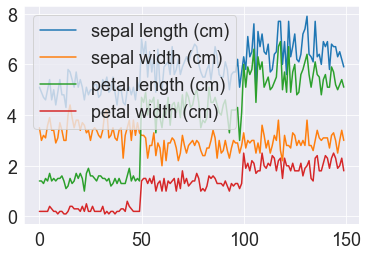

In [19]:
iris.plot()

We will however use seaborn for some still basic but nicer and more complete visualization

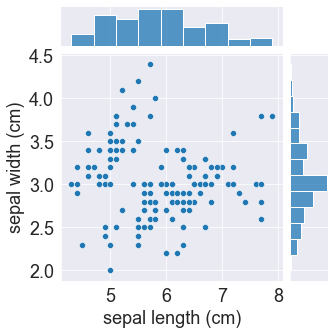

In [20]:
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, height=5);

Let us define an array with all the names of the features and plot their correlations. 

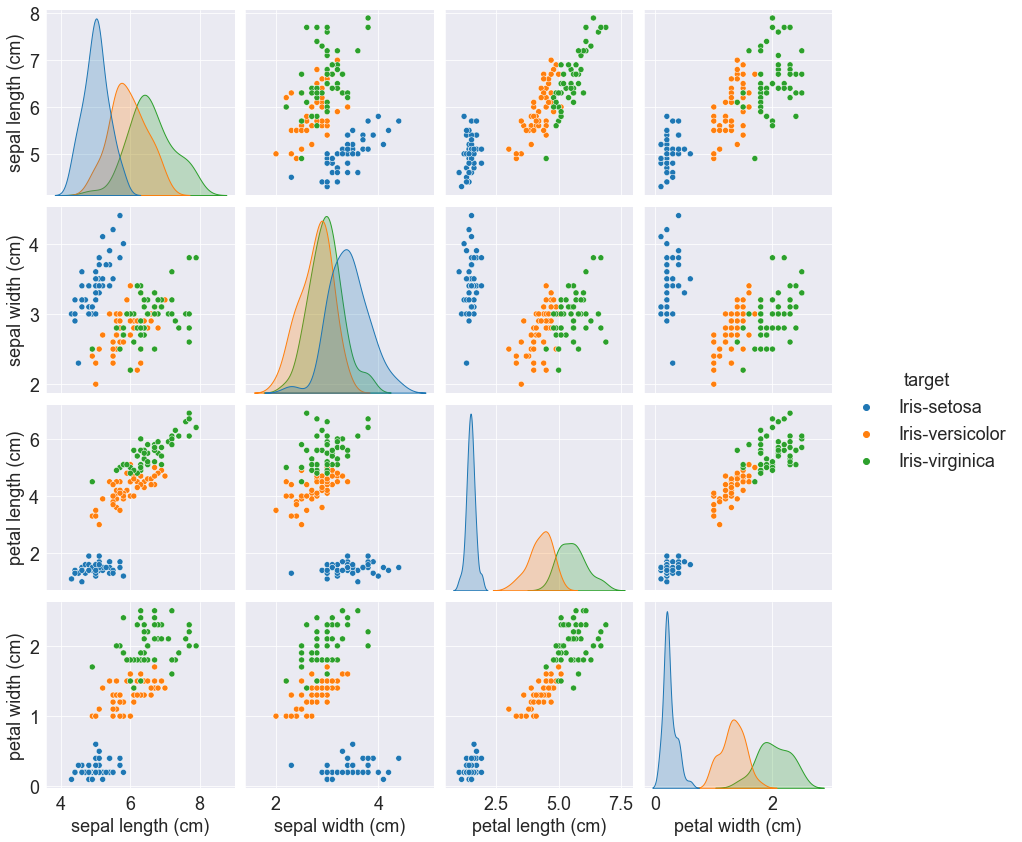

In [21]:
features = iris.columns.values[:-1]
sns.pairplot(iris, vars=features, hue='target', height=3);

**Exercise 2**. Plot the histogram of all four features. First, instantiate a Matplotlib figure in a one by four grid, and then pass the matching axes to Seaborn's `distplot` function that draws the histograms. A `figsize=(14, 4)` is a recommended parameter to `plt.subplots`, otherwise the figure will be too squished.

*Optional: Use `zip` to iterate over the axes and the features simultaneously.*

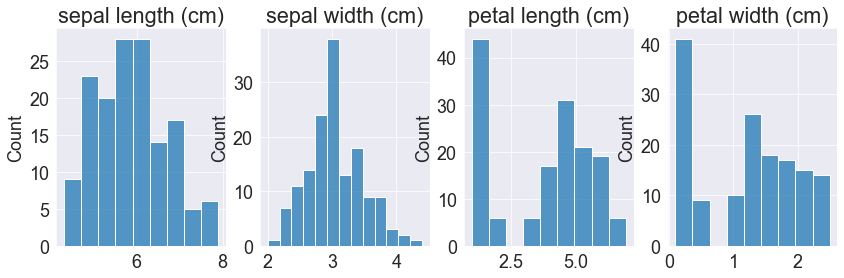

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(14, 4))
names = list(iris[:-1])
for column, axes in zip(names, ax):
    sns.histplot(iris[column].values, ax=axes)
    axes.set_title(column)
plt.show()

The curve you see in the image is the kernel density estimation, the density function that better approximates the observed distribution

You might have noticed by now than Seaborn not only produces nicer plots, but also sometimes performs some data analysis on its own. Recall the `jointplot` a few steps above, where we were getting the Pearson's $r$ coefficient and the corresponding $p$ value. There is a special argument that you can pass to `jointplot` to plot a more complete analysis with the regression line, confidence intervals and kernel density estimation, the `kind` option:

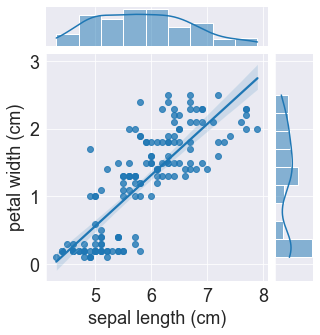

In [23]:
sns.jointplot(x='sepal length (cm)', y='petal width (cm)', data=iris, height=5, kind='reg');

However, for general regression the most common plot is the `regplot`. It can perform linear and simple nonlinear regressions, eliminate outliers, and easily plot conditional data, among others. There is a nice tutorial on all these functionalities [here](https://seaborn.pydata.org/tutorial/regression.html).

For instance, we can fit data to high-order polynomials by passing the argument `order`:

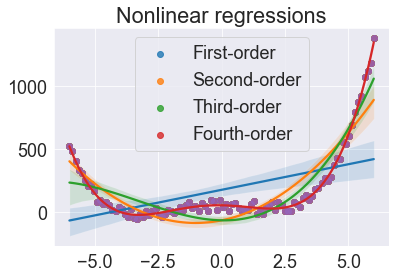

In [24]:
x = np.linspace(-6, 6, 100)
y = x ** 4 + 2 * x ** 3 - 12 * x ** 2 - 2 * x + 6 * np.ones(len(x))
y = y + 100 * np.random.rand(len(x))

sns.regplot(x=x, y=y, label='First-order')
sns.regplot(x=x, y=y, order=2, label='Second-order')
sns.regplot(x=x, y=y, order=3, label='Third-order')
sns.regplot(x=x, y=y, order=4, label='Fourth-order')
sns.regplot(x=x, y=y, fit_reg=False)    # Plot the data in another color

plt.legend()
plt.title('Nonlinear regressions')
plt.show()

**Exercise 3**. Plot the marginal distributions of `petal length` versus `sepal length` for each of the three families of  flowers. First plot the three of them in the same plot, then do it on separate subplots. Note that when you are doing the three on the same plot, you will have to modify your axes length to see all the data.

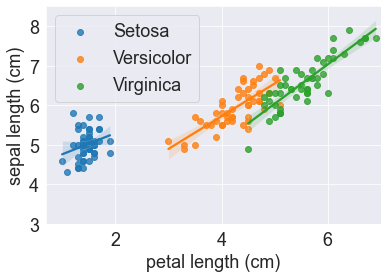

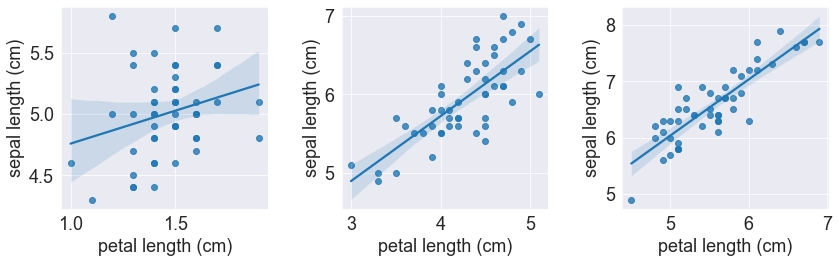

In [25]:
# First three together
plt.xlim(0.7, 7)
plt.ylim(3, 8.5)
sns.regplot(x='petal length (cm)', y='sepal length (cm)', data=iris.loc[iris['target']=='Iris-setosa'], label='Setosa')
sns.regplot(x='petal length (cm)', y='sepal length (cm)', data=iris.loc[iris['target']=='Iris-versicolor'], label='Versicolor')
sns.regplot(x='petal length (cm)', y='sepal length (cm)', data=iris.loc[iris['target']=='Iris-virginica'], label='Virginica')
plt.legend()
plt.show()

# Now separate
fig, ax = plt.subplots(ncols=3, figsize=(12,4))
for i, type_ in enumerate(np.unique(iris['target'])):
    sns.regplot(x='petal length (cm)', y='sepal length (cm)', data=iris.loc[iris['target']==type_], ax=ax[i])
    ax[i].set_title=(type_)

plt.tight_layout()
plt.show()

## Interactive Plotting

Now we turn to review some packages very useful not only for visualizing data, but also interacting with it and obtaining individual information about the points studied. In particular we will review briefly the interactive capabilities of [Matplotlib](https://matplotlib.org/users/interactive.html), after which we will move on to the dedicated package [Bokeh](http://bokeh.pydata.org/en/latest/).

### Matplotlib

Matplotlib contains some [interacting capabilities](https://matplotlib.org/users/interactive.html), although in general it is heavier to code and most of the features have to be coded by hand (and, as you will see, some of the features are not flawlessly implemented with Jupyter). Let us analyze an example where clicking on points give you the information about them.

In [26]:
%matplotlib
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Click on points')

line, = ax.plot(np.random.rand(100), 'o', picker=5)  # 5 points tolerance

def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    points = tuple(zip(xdata[ind], ydata[ind]))
    print('onpick points:', points)

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

Using matplotlib backend: Qt5Agg


You see it is relatively simple to create these interactive plots. However, Bokeh makes it everything much much simpler, and has a lot of interactive tools already built in.

### Bokeh

[Bokeh](http://bokeh.pydata.org/en/latest/) is a Python interactive visualization library. Not only it allows for creating aesthetically-pleasant plots (we already have Seaborn for that), but it also gives a lot of power to _interact with_ the plot. You can zoom, pan, focus on a subset of data..., and obtain live information of each data point as you scroll the mouse over it. As we will see, one of the peculiarities of Bokeh is that it does not operate on the notebook, but every plot is opened in a browser tab. Indeed, Bokeh "translates" the plot into HTML code that can then be shared easily without losing the interactivity.

Let us begin with a simple example with randomly-generated points

In [27]:
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5

# Colors for the points. Each color is written in RGB format #RRGGBB, where each of the intensities is specified by
# a 2-digit hexadecimal number. Each of these numbers is specified by a string %02x. Note that we keep the
# intensity of B constant, while R and G depend on the specific point
colors = ['#%02x%02x%02x' % (int(r), int(g), 150) for r, g in zip(50 + 2 * x, 30 + 2 * y)]

Bokeh contains some tools to interact with the plots. These include zooming, selecting som subset of data, panning... etc. You can check all the tools available in the [documentation](http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#built-in-tools)

In [28]:
TOOLS = 'hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select'

As usual, we create a figure, now with the tools needed, and once the figure is created we can insert the plot. The only difference is that the command `show` will now open a new tab where the plot will be displayed

In [29]:
p = bkh.figure(tools=TOOLS, title='Color scatter')

p.scatter(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

bkh.output_file('color_scatter.html', title='Color scatter example')

bkh.show(p)

Note that to export the plots now we have called the `output_file` command, instead of Matplotlib's `savefig`. There is a difference, however: `output_file` can be called *before* creating the Figure environment and doing the plot (we will see an example a bit below), because it sets a higher "environment" where the figure will be created. Spend two minutes playing with the plot, using the tools and checking how information of the individual datapoints can be accessed.

Bokeh works very similarly to Seaborn+Pandas in terms of syntax. The information of individual datapoints is contained in a `ColumnDataSource`, which can accept Pandas dataframes as inputs. Then, the information to display is specified when creating a custom `HoverTool` (included in `bokeh.models`). For example, let's say we want to show, for each point, not only its coordinates but also the information about its color and its radius.